In [1]:
import matplotlib.pyplot as plt

"""
Small demo to illustrate how the plot function and the gridworld environment work
"""
import numpy as np
import optuna
from gridworld import *
from plot import *
import optimize_steps
import optimize_episodes
import select_action
from sarsa import *
from qlearning import *
#from optimize import *

COUNT_ENVIRONMENT = 10

In [2]:
def load_study(study_name, storage):
    loaded_study = optuna.load_study(study_name=study_name, storage=storage)
    best_params = loaded_study.best_trial.params
    return best_params

In [3]:
SARSA_PARAMS_A1 = load_study('DRL_Studienarbeit1_A1_sarsa','sqlite:///DRL_Studienarbeit1_A1_sarsa.db')
SARSA_PARAMS_A2 = load_study('DRL_Studienarbeit1_A2_sarsa','sqlite:///DRL_Studienarbeit1_A2_sarsa.db')

Q_PARAMS_A1 = load_study('DRL_Studienarbeit1_A1','sqlite:///DRL_Studienarbeit1_A1.db')
Q_PARAMS_A2 = load_study('test','sqlite:///DRL_Studienarbeit1_A2.db')

#TODO: Hyperparameter für Epsilon-Greedy (und UCB) finden

In [2]:
a1_env = Random(size=12, water=0.3, mountain=0)
a2_env = Random(size = 12, water=0, mountain=0.3)

In [4]:
for row in a1_env.grid:
    print(row)

[' ', ' ', ' ', ' ', ' ', 'O', ' ', ' ', 'G', ' ', ' ', ' ']
[' ', 'O', 'O', ' ', ' ', ' ', 'O', ' ', ' ', ' ', 'O', 'O']
[' ', ' ', 'O', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
['O', ' ', ' ', 'O', ' ', ' ', 'O', ' ', 'O', 'O', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'O', ' ', ' ']
[' ', 'O', 'O', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', 'O']
[' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ', ' ', 'O', ' ', 'O']
[' ', ' ', 'O', 'O', ' ', ' ', ' ', ' ', ' ', ' ', 'O', ' ']
[' ', ' ', ' ', 'O', ' ', 'O', ' ', ' ', ' ', ' ', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'O', ' ', ' ']
[' ', ' ', ' ', ' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', ' ']
['O', ' ', ' ', ' ', ' ', 'O', ' ', ' ', ' ', 'O', ' ', 'S']


In [5]:
study = optimize_steps.optimize_steps(a1_env)
study.study_qlearning_decay_epsilon("qlearning_a1_decay_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
study.study_qlearning_epsilon_greedy("qlearning_a1_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
study.study_qlearning_ucb("qlearning_a1_ucb", "sqlite:///hyperparameters_A1.db", "maximize")

study.study_sarsa_decay_epsilon("sarsa_a1_decay_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
study.study_sarsa_epsilon_greedy("sarsa_a1_epsilon", "sqlite:///hyperparameters_A1.db", "maximize")
study.study_sarsa_ucb("sarsa_a1_ucb", "sqlite:///hyperparameters_A1.db", "maximize")

[I 2023-12-07 22:10:11,435] Using an existing study with name 'sarsa_a1_decay_epsilon' instead of creating a new one.
[I 2023-12-07 22:10:11,741] Trial 3 finished with value: -689.7357281831936 and parameters: {'EPISODES': 1520, 'INIT_VALUE': 8, 'MAX_EPISODE_LENGTH': 2186, 'GAMMA': 0.7091081777993156, 'ALPHA': 0.9599212394073116, 'EPS': 0.07535731629663578, 'DECAY': 0.6912597603185213}. Best is trial 3 with value: -689.7357281831936.
[I 2023-12-07 22:11:17,005] Trial 4 finished with value: -5.840066507443283 and parameters: {'EPISODES': 12102, 'INIT_VALUE': 16, 'MAX_EPISODE_LENGTH': 985, 'GAMMA': 0.5695940471265142, 'ALPHA': 0.054649948178019936, 'EPS': 0.5134791593648245, 'DECAY': 0.36483921705265754}. Best is trial 4 with value: -5.840066507443283.
[I 2023-12-07 22:12:51,706] Trial 5 finished with value: -5.801400513142372 and parameters: {'EPISODES': 10854, 'INIT_VALUE': 13, 'MAX_EPISODE_LENGTH': 2129, 'GAMMA': 0.7891997382570571, 'ALPHA': 0.4110786870962918, 'EPS': 0.53934385449419

In [ ]:
study2 = optimize_episodes.optimize_episodes(a2_env)
study2.study_qlearning_decay_epsilon("qlearning_a2_decay_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
study2.study_qlearning_epsilon_greedy("qlearning_a2_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
study2.study_qlearning_ucb("qlearning_a2_ucb", "sqlite:///hyperparameters_A2.db", "maximize")

study2.study_sarsa_decay_epsilon("sarsa_a2_decay_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
study2.study_sarsa_epsilon_greedy("sarsa_a2_epsilon", "sqlite:///hyperparameters_A2.db", "maximize")
study2.study_sarsa_ucb("sarsa_a2_ucb", "sqlite:///hyperparameters_A2.db", "maximize")

[I 2023-12-08 10:08:00,918] A new study created in RDB with name: qlearning_a2_decay_epsilon
[I 2023-12-08 10:08:02,494] Trial 0 finished with value: -3.244824266671244 and parameters: {'EPISODES': 1567, 'INIT_VALUE': 14, 'MAX_EPISODE_LENGTH': 3326, 'GAMMA': 0.4439175999601762, 'ALPHA': 0.9025261733347372, 'EPS': 0.2970472888640894, 'DECAY': 0.002046260244070397}. Best is trial 0 with value: -3.244824266671244.
[I 2023-12-08 10:08:04,384] Trial 1 finished with value: -0.001490621502654453 and parameters: {'EPISODES': 14798, 'INIT_VALUE': 3, 'MAX_EPISODE_LENGTH': 2045, 'GAMMA': 0.7095016040395242, 'ALPHA': 0.3389389078040842, 'EPS': 0.12918715834649552, 'DECAY': 0.7973144678374746}. Best is trial 1 with value: -0.001490621502654453.
[I 2023-12-08 10:08:06,332] Trial 2 finished with value: -0.37226172329018453 and parameters: {'EPISODES': 14887, 'INIT_VALUE': 15, 'MAX_EPISODE_LENGTH': 3397, 'GAMMA': 0.3860543884293721, 'ALPHA': 0.6882530234063997, 'EPS': 0.2576334029808026, 'DECAY': 0.59

# Plot 1: Cumulative reward of the current episode over episodes

In [ ]:
qlearning_data={}
sarsa_data={}
qlearning_data_no_decay={}
sarsa_data_no_decay={}
qlearning_data_ucb={}
sarsa_data_ucb={}
envs_A1 = []

q = qlearning(Q_PARAMS_A1['ALPHA'],
                  Q_PARAMS_A1['GAMMA'],
                  Q_PARAMS_A1['EPISODES'],
                  Q_PARAMS_A1['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A1['INIT_REWARD'],
                  Q_PARAMS_A1['EPS'],
                  Q_PARAMS_A1['DECAY'])

q_no_decay = qlearning(Q_PARAMS_A1['ALPHA'],
                  Q_PARAMS_A1['GAMMA'],
                  Q_PARAMS_A1['EPISODES'],
                  Q_PARAMS_A1['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A1['INIT_REWARD'],
                  Q_PARAMS_A1['EPS'])

q_ucb = qlearning(SARSA_PARAMS_A1['ALPHA'],
          SARSA_PARAMS_A1['GAMMA'],
          SARSA_PARAMS_A1['EPISODES'],
          SARSA_PARAMS_A1['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1['INIT_REWARD'],
          SARSA_PARAMS_A1['EPS'],
          0.1)

s = sarsa(SARSA_PARAMS_A1['ALPHA'],
          SARSA_PARAMS_A1['GAMMA'],
          SARSA_PARAMS_A1['EPISODES'],
          SARSA_PARAMS_A1['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1['INIT_REWARD'],
          SARSA_PARAMS_A1['EPS'],
          SARSA_PARAMS_A1['DECAY'])

s_no_decay = sarsa(SARSA_PARAMS_A1['ALPHA'],
          SARSA_PARAMS_A1['GAMMA'],
          SARSA_PARAMS_A1['EPISODES'],
          SARSA_PARAMS_A1['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1['INIT_REWARD'],
          SARSA_PARAMS_A1['EPS'])

s_ucb = sarsa(SARSA_PARAMS_A1['ALPHA'],
          SARSA_PARAMS_A1['GAMMA'],
          SARSA_PARAMS_A1['EPISODES'],
          SARSA_PARAMS_A1['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1['INIT_REWARD'],
          SARSA_PARAMS_A1['EPS'],
          0.1)

env = Random(size=12, water=0.3, mountain=0)



for i in range(COUNT_ENVIRONMENT):
    env = Random(size=12, water=0.3, mountain=0)
    envs_A1.append(env)     
    print(f"running environment: {i}")
    
    qlearning_data[i] = q.run_decay_epsilon_greedy(env)
    sarsa_data[i] = s.run_decay_epsilon_greedy(env)
    
    qlearning_data_no_decay[i] = q_no_decay.run_epsilon_greedy(env)
    sarsa_data_no_decay[i] = s_no_decay.run_epsilon_greedy(env)
    
    qlearning_data_ucb[i] = q_ucb.run_ucb(env)
    sarsa_data_ucb[i] = s_ucb.run_ucb(env)


## Decaying Epsilon Greedy

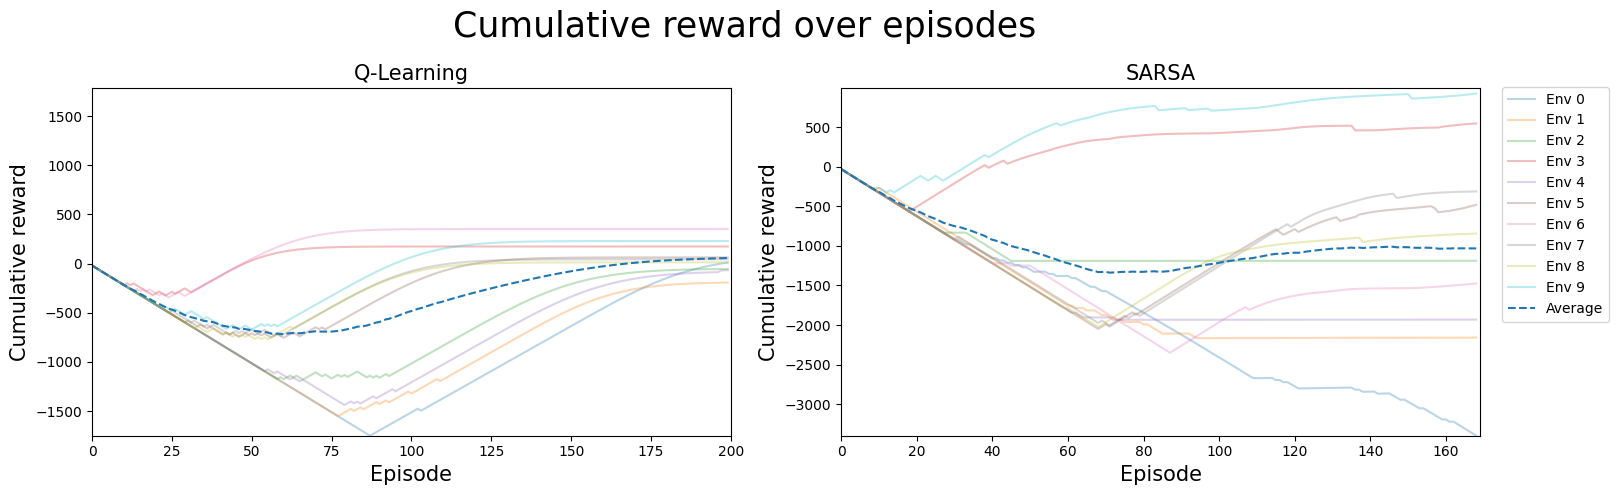

In [5]:
plot_episodes([qlearning_data, sarsa_data], [Q_PARAMS_A1['EPISODES'], SARSA_PARAMS_A1['EPISODES']], ['Q-Learning', 'SARSA'])

## Epsilon Greedy

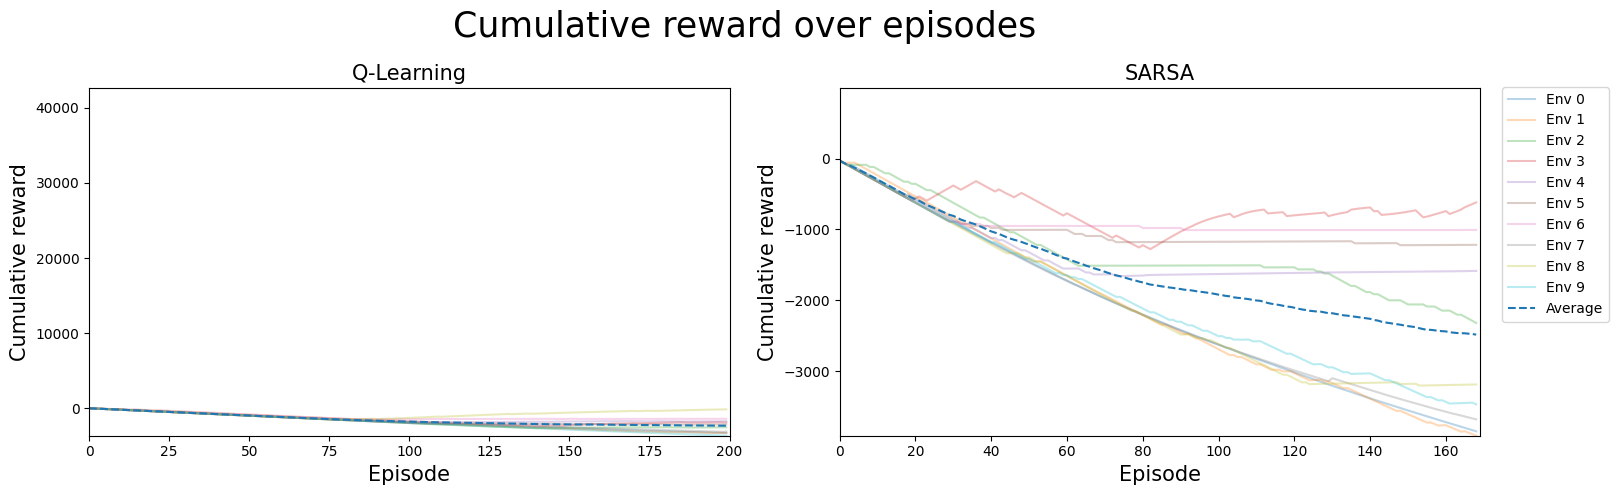

In [6]:
plot_episodes([qlearning_data_no_decay, sarsa_data_no_decay], [Q_PARAMS_A1['EPISODES'], SARSA_PARAMS_A1['EPISODES']], ['Q-Learning', 'SARSA'])

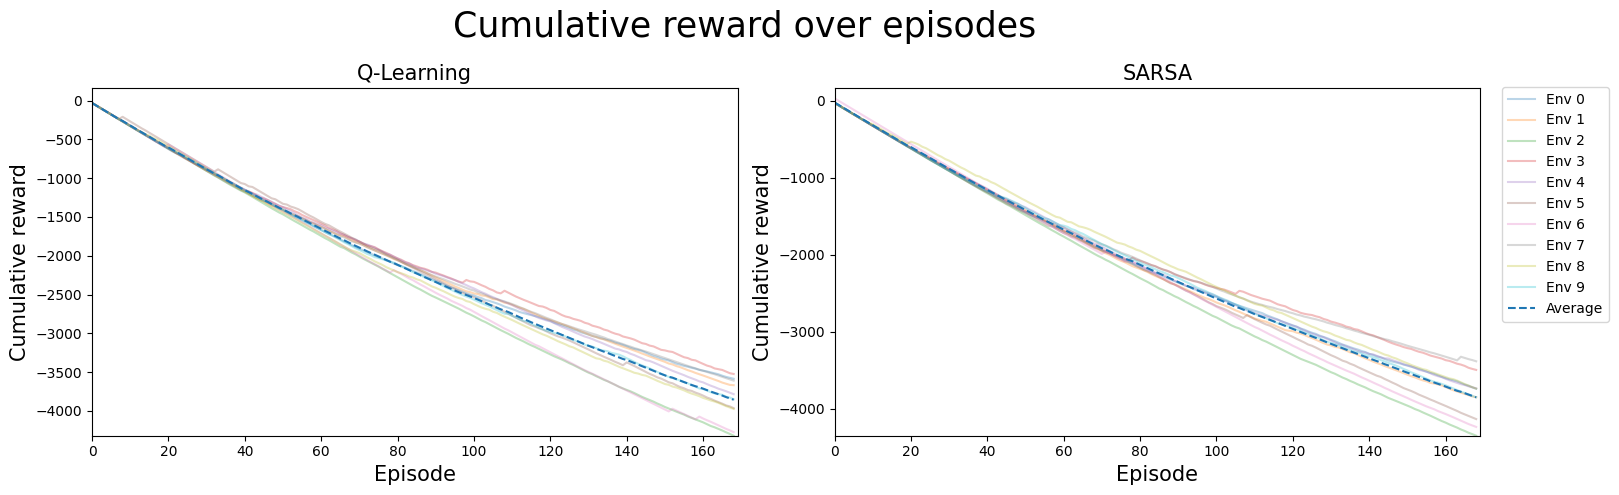

In [7]:
plot_episodes([qlearning_data_ucb, sarsa_data_ucb], [Q_PARAMS_A1['EPISODES'], SARSA_PARAMS_A1['EPISODES']], ['Q-Learning', 'SARSA'])

# Plot 2: Cumulative reward over amount of steps

In [7]:
qlearning_data_A2={}
sarsa_data_A2={}
qlearning_data_no_decay_A2={}
sarsa_data_no_decay_A2={}
envs2 = []

q2 = qlearning(Q_PARAMS_A2['ALPHA'],
                Q_PARAMS_A2['GAMMA'],
                Q_PARAMS_A2['EPISODES'],
                Q_PARAMS_A2['MAX_EPISODE_LENGTH'],
                Q_PARAMS_A2['INIT_VALUE'],
                Q_PARAMS_A2['EPS'],
                Q_PARAMS_A2['DECAY'])

s2 = sarsa(SARSA_PARAMS_A2['ALPHA'],
            SARSA_PARAMS_A2['GAMMA'],
            SARSA_PARAMS_A2['EPISODES'],
            SARSA_PARAMS_A2['MAX_EPISODE_LENGTH'],
            SARSA_PARAMS_A2['INIT_REWARD'],
            SARSA_PARAMS_A2['EPS'],
            SARSA_PARAMS_A2['DECAY'])

s_no_decay_2 = sarsa(SARSA_PARAMS_A1['ALPHA'],
          SARSA_PARAMS_A1['GAMMA'],
          SARSA_PARAMS_A1['EPISODES'],
          SARSA_PARAMS_A1['MAX_EPISODE_LENGTH'],
          SARSA_PARAMS_A1['INIT_REWARD'],
          SARSA_PARAMS_A1['EPS'])

q_no_decay_2 = qlearning(Q_PARAMS_A1['ALPHA'],
                  Q_PARAMS_A1['GAMMA'],
                  Q_PARAMS_A1['EPISODES'],
                  Q_PARAMS_A1['MAX_EPISODE_LENGTH'],
                  Q_PARAMS_A1['INIT_REWARD'],
                  Q_PARAMS_A1['EPS'])

for i in range(COUNT_ENVIRONMENT):
    env = Random(size=12, water=0, mountain=0.3)
    envs2.append(env)
    print(f"running env: {i}")
    
    qlearning_data_A2[i] = q2.run_decay_epsilon_greedy(env)
    sarsa_data_A2[i] = s2.run_decay_epsilon_greedy(env)
    
    qlearning_data_no_decay[i] = q_no_decay_2.run_epsilon_greedy(env)
    sarsa_data_no_decay[i] = s_no_decay_2.run_epsilon_greedy(env)


running env: 0
running env: 1
running env: 2
running env: 3
running env: 4
running env: 5
running env: 6
running env: 7
running env: 8
running env: 9


# Decaying Epsilon Greedy

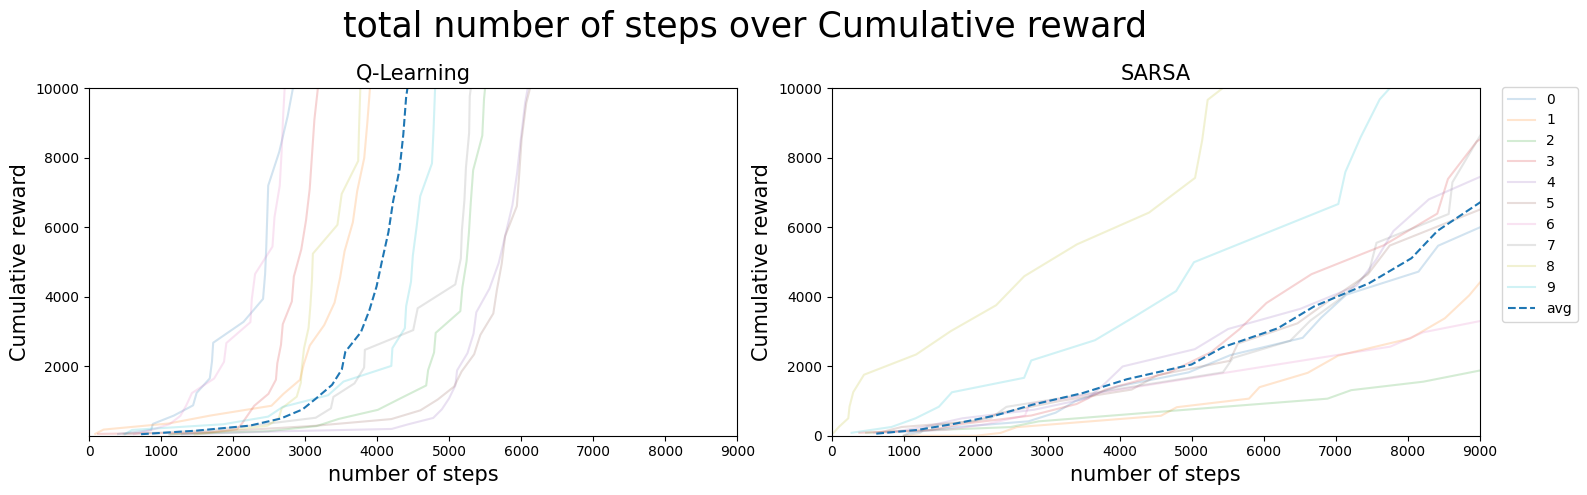

In [8]:
plot_steps([qlearning_data_A2, sarsa_data_A2], [Q_PARAMS_A2['EPISODES'], SARSA_PARAMS_A2['EPISODES']], ['Q-Learning', 'SARSA'])

# Epsilon Greedy

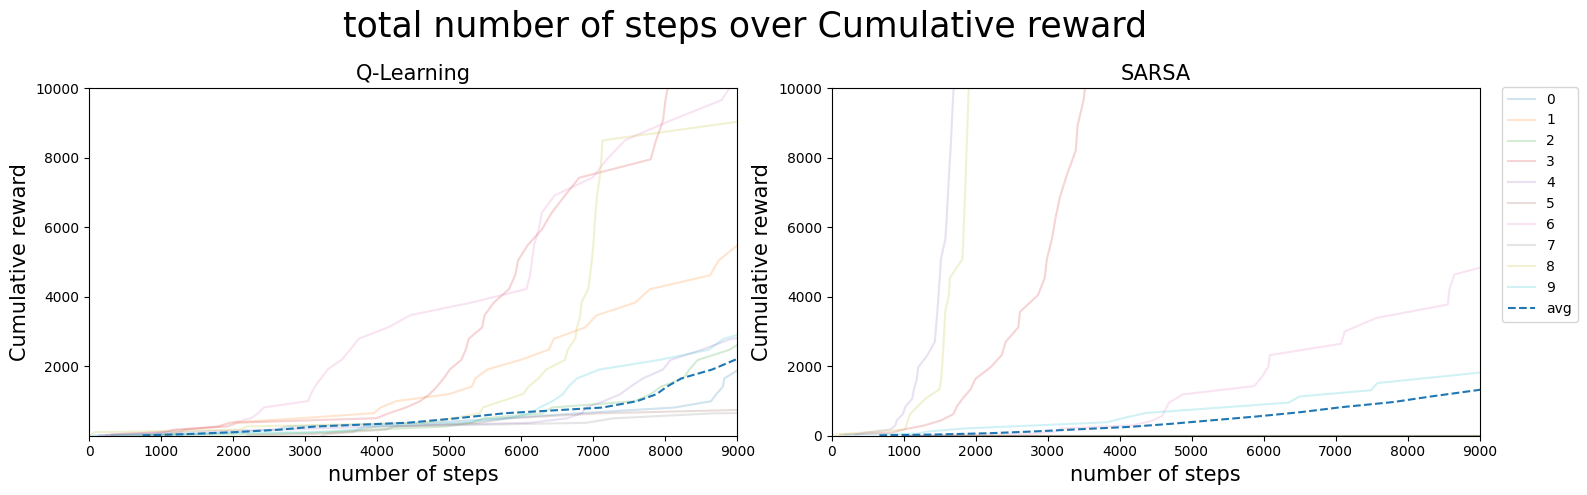

In [9]:
plot_steps([qlearning_data_no_decay, sarsa_data_no_decay], [Q_PARAMS_A2['EPISODES'], SARSA_PARAMS_A2['EPISODES']], ['Q-Learning', 'SARSA'])
